In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tdata = pd.read_csv('tdata.csv')

In [3]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [3]:
tdata.drop(columns = 'ID', inplace = True)

In [5]:
tdata['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [7]:
tdata['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

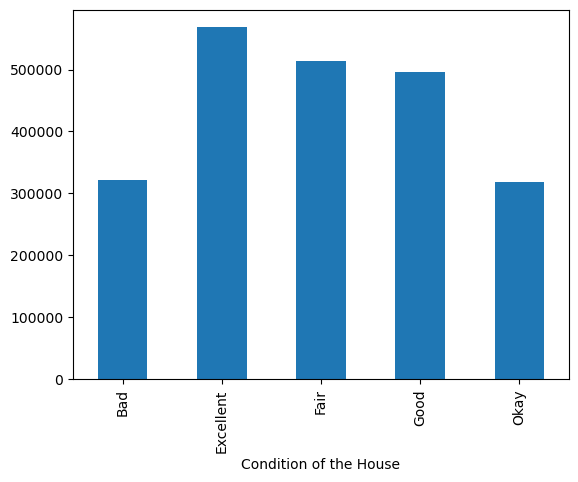

In [8]:
tdata.groupby('Condition of the House',
             )['Sale Price'].mean().plot(kind = 'bar')

<Axes: xlabel='Condition of the House'>

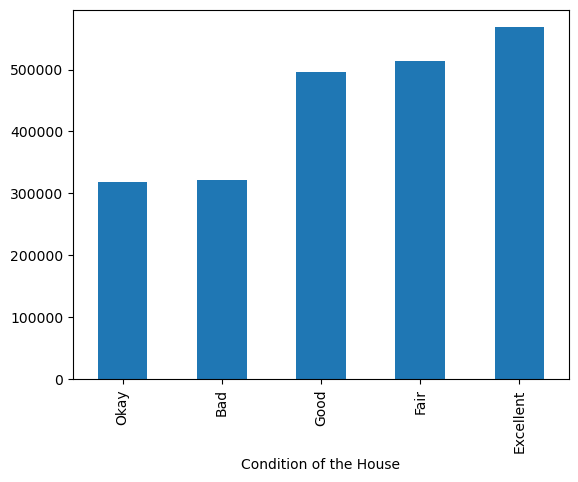

In [9]:
tdata.groupby('Condition of the House',
             )['Sale Price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Zipcode'>

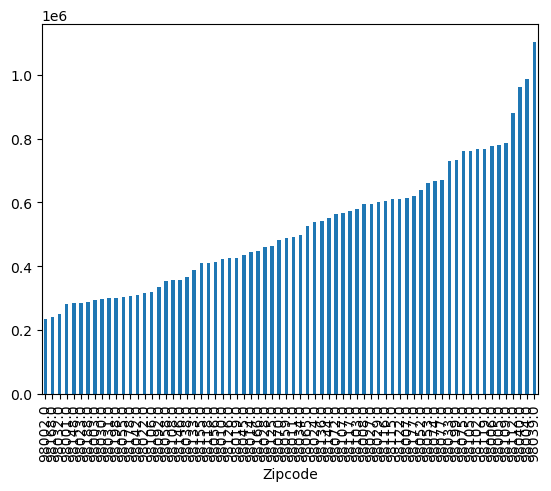

In [10]:
tdata.groupby('Zipcode',
             )['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [11]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [4]:
tdata = tdata.rename(columns = {'Sale Price': 'Sale_Price'})

In [5]:
tdata = tdata.rename(columns = {'Condition of the House' : 'Condition_of_the_House'})

In [6]:
tdata  = tdata.rename(columns = {'Ever Renovate' : 'Ever_Renovate'})

In [7]:
tdata = tdata.rename(columns = {'Waterfront View': 'Waterfront_View'})

In [17]:
tdata.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovate,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [20]:
mod = ols('Sale_Price ~ Condition_of_the_House', data=tdata).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     58.26
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           5.45e-49
Time:                        17:38:37   Log-Likelihood:            -2.9913e+05
No. Observations:               21609   AIC:                         5.983e+05
Df Residuals:                   21604   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [19]:
Anova_Table = sm.stats.anova_lm(mod, type = 2)

In [21]:
print(Anova_Table)

                             df        sum_sq       mean_sq         F  \
Condition_of_the_House      4.0  1.441831e+13  3.604579e+12  58.25563   
Residual                21604.0  1.336752e+15  6.187520e+10       NaN   

                              PR(>F)  
Condition_of_the_House  5.447605e-49  
Residual                         NaN  


# Creation of Binning and Dummy Variables

In [8]:
tdata

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovate,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [4]:
tdata['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [9]:
tdata = pd.get_dummies(tdata, columns = ['Condition_of_the_House'], drop_first = True,dtype=int)

In [21]:
tdata.head(5)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovate,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [10]:
tdata = pd.get_dummies(tdata, columns = ['Ever_Renovate','Waterfront_View'], drop_first = True,dtype=int)

In [25]:
tdata.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovate_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


#Binning

In [11]:
Zip_Table = tdata.groupby('Zipcode').agg({'Sale_Price': 'mean'}).sort_values('Sale_Price', ascending = True)

In [12]:
Zip_Table

,Sale_Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


In [14]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'], bins = 10,
                                   labels = [
                                       'Zipcode_grp_0',
                                       'Zipcode_grp_1',
                                       'Zipcode_grp_2',
                                       'Zipcode_grp_3',
                                       'Zipcode_grp_4',
                                       'Zipcode_grp_5',
                                       'Zipcode_grp_6',
                                       'Zipcode_grp_7',
                                       'Zipcode_grp_8',
                                       'Zipcode_grp_9'
                                   ],include_lowest = True)

In [15]:
Zip_Table

,Sale_Price,Zipcode_Group
Zipcode,,
98002.0,2.342840e+05,Zipcode_grp_0
98168.0,2.403284e+05,Zipcode_grp_0
98032.0,2.512962e+05,Zipcode_grp_0
98001.0,2.808047e+05,Zipcode_grp_0
98148.0,2.849086e+05,Zipcode_grp_0
...,...,...
98109.0,7.876028e+05,Zipcode_grp_6
98112.0,8.807990e+05,Zipcode_grp_7
98040.0,9.621087e+05,Zipcode_grp_8


In [16]:
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

In [17]:
tdata = pd.merge(tdata,Zip_Table,left_on = 'Zipcode',how = 'left',right_index = True)

In [20]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Sale_Price                                 21609 non-null  float64 
 1   No of Bedrooms                             21609 non-null  int64   
 2   No of Bathrooms                            21609 non-null  float64 
 3   Flat Area (in Sqft)                        21609 non-null  float64 
 4   Lot Area (in Sqft)                         21609 non-null  float64 
 5   No of Floors                               21609 non-null  float64 
 6   No of Times Visited                        21609 non-null  int64   
 7   Overall Grade                              21609 non-null  int64   
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64 
 9   Basement Area (in Sqft)                    21609 non-null  int64   
 10  Age of Hou

In [22]:
tdata = tdata.drop(columns='Zipcode')

In [25]:
tdata = pd.get_dummies(tdata, columns = ['Zipcode_Group'],drop_first = True,dtype=int)

In [26]:
tdata.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_grp_1,Zipcode_Group_Zipcode_grp_2,Zipcode_Group_Zipcode_grp_3,Zipcode_Group_Zipcode_grp_4,Zipcode_Group_Zipcode_grp_5,Zipcode_Group_Zipcode_grp_6,Zipcode_Group_Zipcode_grp_7,Zipcode_Group_Zipcode_grp_8,Zipcode_Group_Zipcode_grp_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
tdata.to_csv('tdata2_.csv', index=False)

# Splitting and Feature Scaling the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tdata2_ = pd.read_csv('tdata2_.csv')

In [3]:
tdata2_.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_grp_1,Zipcode_Group_Zipcode_grp_2,Zipcode_Group_Zipcode_grp_3,Zipcode_Group_Zipcode_grp_4,Zipcode_Group_Zipcode_grp_5,Zipcode_Group_Zipcode_grp_6,Zipcode_Group_Zipcode_grp_7,Zipcode_Group_Zipcode_grp_8,Zipcode_Group_Zipcode_grp_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
tdata2_.describe()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_grp_1,Zipcode_Group_Zipcode_grp_2,Zipcode_Group_Zipcode_grp_3,Zipcode_Group_Zipcode_grp_4,Zipcode_Group_Zipcode_grp_5,Zipcode_Group_Zipcode_grp_6,Zipcode_Group_Zipcode_grp_7,Zipcode_Group_Zipcode_grp_8,Zipcode_Group_Zipcode_grp_9
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,...,0.007543,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,2.500620e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,...,0.086525,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
Y = tdata2_.iloc[:,0]

In [6]:
X = tdata2_.iloc[:,1:31]

In [7]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_grp_1,Zipcode_Group_Zipcode_grp_2,Zipcode_Group_Zipcode_grp_3,Zipcode_Group_Zipcode_grp_4,Zipcode_Group_Zipcode_grp_5,Zipcode_Group_Zipcode_grp_6,Zipcode_Group_Zipcode_grp_7,Zipcode_Group_Zipcode_grp_8,Zipcode_Group_Zipcode_grp_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [8]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [13]:
X_train.shape

(15126, 30)

In [14]:
X_test.shape

(6483, 30)

In [16]:
 X.describe()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_grp_1,Zipcode_Group_Zipcode_grp_2,Zipcode_Group_Zipcode_grp_3,Zipcode_Group_Zipcode_grp_4,Zipcode_Group_Zipcode_grp_5,Zipcode_Group_Zipcode_grp_6,Zipcode_Group_Zipcode_grp_7,Zipcode_Group_Zipcode_grp_8,Zipcode_Group_Zipcode_grp_9
count,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,46.999722,...,0.007543,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,29.373317,...,0.086525,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,118.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [18]:
X_train = scale.fit_transform(X_train)

In [19]:
X_train

array([[ 0.66267649,  0.17316109,  0.80618439, ..., -0.1112746 ,
        -0.16733363, -0.04675943],
       [-1.46413118,  0.49946415, -0.86651953, ..., -0.1112746 ,
        -0.16733363, -0.04675943],
       [-0.40072735, -1.45835422, -0.64642691, ..., -0.1112746 ,
        -0.16733363, -0.04675943],
       ...,
       [-1.46413118, -1.45835422, -1.51579277, ..., -0.1112746 ,
        -0.16733363, -0.04675943],
       [ 0.66267649, -0.47944503, -0.63542228, ..., -0.1112746 ,
        -0.16733363, -0.04675943],
       [ 1.72608032,  1.47837334,  0.68513344, ..., -0.1112746 ,
        -0.16733363, -0.04675943]])

In [20]:
X_test = scale.fit_transform(X_test)

In [21]:
X_test

array([[ 0.71106266,  2.42764008,  2.37610033, ..., -0.11457334,
        -0.17234093, -0.05127511],
       [-0.39414454, -0.13937845,  0.29179256, ..., -0.11457334,
        -0.17234093, -0.05127511],
       [-0.39414454, -0.46025577, -0.13357638, ..., -0.11457334,
        -0.17234093, -0.05127511],
       ...,
       [-0.39414454,  0.50237618,  0.8128695 , ..., -0.11457334,
        -0.17234093, -0.05127511],
       [ 0.71106266,  1.46500813,  1.32331222, ..., -0.11457334,
        -0.17234093, -0.05127511],
       [-0.39414454, -1.42288772, -1.19699871, ..., -0.11457334,
        -0.17234093, -0.05127511]])